In [1]:
from src.parsers.j30 import load_j30
from src.parsers.patterson import load_patterson
from src.parsers.c15 import load_c15
from src.parsers.jobshop import load_jobshop

from src.general_optimization_solver import load_instance, load_raw_instance, load_benchmark, load_raw_benchmark

from src.solvers.rcpsp import RCPSPSolver
from src.solvers.mmrcpsp import MMRCPSPSolver
from src.solvers.jobshop import JobShopSolver


In [2]:
# solution.write("test.json")
# solution.write_in_string()

J10

In [12]:
benchmark = load_raw_benchmark("raw_data/mm-rcpsp/j10.mm", "raw_data/mm-rcpsp/j10opt.mm.html", "c15")

Loading raw benchmark data
Dumping instances to their respective paths
j1010_1
dumping to data/MMRCPSP/j10.mm/j1010_1.json
j1010_10
dumping to data/MMRCPSP/j10.mm/j1010_10.json
j1010_2
dumping to data/MMRCPSP/j10.mm/j1010_2.json
j1010_3
dumping to data/MMRCPSP/j10.mm/j1010_3.json
j1010_4
dumping to data/MMRCPSP/j10.mm/j1010_4.json
j1010_5
dumping to data/MMRCPSP/j10.mm/j1010_5.json
j1010_6
dumping to data/MMRCPSP/j10.mm/j1010_6.json
j1010_7
dumping to data/MMRCPSP/j10.mm/j1010_7.json
j1010_8
dumping to data/MMRCPSP/j10.mm/j1010_8.json
j1010_9
dumping to data/MMRCPSP/j10.mm/j1010_9.json
j1011_1
dumping to data/MMRCPSP/j10.mm/j1011_1.json
j1011_10
dumping to data/MMRCPSP/j10.mm/j1011_10.json
j1011_2
dumping to data/MMRCPSP/j10.mm/j1011_2.json
j1011_3
dumping to data/MMRCPSP/j10.mm/j1011_3.json
j1011_4
dumping to data/MMRCPSP/j10.mm/j1011_4.json
j1011_5
dumping to data/MMRCPSP/j10.mm/j1011_5.json
j1011_6
dumping to data/MMRCPSP/j10.mm/j1011_6.json
j1011_7
dumping to data/MMRCPSP/j10.mm/j1

In [14]:
benchmark.solve(MMRCPSPSolver())

solving j1010_1
Running CP solver
c:/Users/tomom/Desktop/skola/diplomka/General-Optimization-Solver/src/solvers/mmrcpsp.py:33(stream:73:6): Warning: Cumulative expression 'pulse': height is zero, expression is zero everywhere.
                                                                                                                     VarCumulAtom_83 = pulse(task_0_mode_0, 0)
c:/Users/tomom/Desktop/skola/diplomka/General-Optimization-Solver/src/solvers/mmrcpsp.py:33(stream:73:56): Warning: Cumulative expression 'pulse': height is zero, expression is zero everywhere.
                                                                                                                      VarCumulAtom_85 = pulse(task_1_mode_1, 0)
c:/Users/tomom/Desktop/skola/diplomka/General-Optimization-Solver/src/solvers/mmrcpsp.py:33(stream:73:81): Warning: Cumulative expression 'pulse': height is zero, expression is zero everywhere.
                                                                  

C15

In [9]:
benchmark = load_raw_benchmark("raw_data/mm-rcpsp/c15.mm", "raw_data/mm-rcpsp/c15opt.mm.html", "c15")

# benchmark.solve(RCPSPSolver())

Loading raw benchmark data
Dumping instances to their respective paths
c1510_1
dumping to data/MMRCPSP/c15.mm/c1510_1.json
c1510_10
dumping to data/MMRCPSP/c15.mm/c1510_10.json
c1510_2
dumping to data/MMRCPSP/c15.mm/c1510_2.json
c1510_3
dumping to data/MMRCPSP/c15.mm/c1510_3.json
c1510_4
dumping to data/MMRCPSP/c15.mm/c1510_4.json
c1510_5
dumping to data/MMRCPSP/c15.mm/c1510_5.json
c1510_6
dumping to data/MMRCPSP/c15.mm/c1510_6.json
c1510_7
dumping to data/MMRCPSP/c15.mm/c1510_7.json
c1510_8
dumping to data/MMRCPSP/c15.mm/c1510_8.json
c1510_9
dumping to data/MMRCPSP/c15.mm/c1510_9.json
c1511_1
dumping to data/MMRCPSP/c15.mm/c1511_1.json
c1511_10
dumping to data/MMRCPSP/c15.mm/c1511_10.json
c1511_2
dumping to data/MMRCPSP/c15.mm/c1511_2.json
c1511_3
dumping to data/MMRCPSP/c15.mm/c1511_3.json
c1511_4
dumping to data/MMRCPSP/c15.mm/c1511_4.json
c1511_5
dumping to data/MMRCPSP/c15.mm/c1511_5.json
c1511_6
dumping to data/MMRCPSP/c15.mm/c1511_6.json
c1511_7
dumping to data/MMRCPSP/c15.mm/c1

In [4]:
# instance = load_raw_instance("raw_data/mm-rcpsp/c15.mm/c154_3.mm", "raw_data/mm-rcpsp/c15opt.mm.html", "c15")

# solution, _ = MMRCPSPSolver().solve(instance, "CP")
# # instance.solve(True, True)

Running CP solver
c:/Users/tomom/Desktop/skola/diplomka/General-Optimization-Solver/src/solvers/mmrcpsp.py:33(stream:103:6): Warning: Cumulative expression 'pulse': height is zero, expression is zero everywhere.
                                                                                                                      VarCumulAtom_125 = pulse(task_0_mode_0, 0)
c:/Users/tomom/Desktop/skola/diplomka/General-Optimization-Solver/src/solvers/mmrcpsp.py:33(stream:103:56): Warning: Cumulative expression 'pulse': height is zero, expression is zero everywhere.
                                                                                                                       VarCumulAtom_127 = pulse(task_1_mode_1, 0)
c:/Users/tomom/Desktop/skola/diplomka/General-Optimization-Solver/src/solvers/mmrcpsp.py:33(stream:103:81): Warning: Cumulative expression 'pulse': height is zero, expression is zero everywhere.
                                                                           

In [5]:
# instance = load_instance("data/MMRCPSP/c15.mm/c154_3.json")
# solution, _ = MMRCPSPSolver().solve(instance, "CP")
# # instance.solve(True, True)

Running CP solver
c:/Users/tomom/Desktop/skola/diplomka/General-Optimization-Solver/src/solvers/mmrcpsp.py:33(stream:103:6): Warning: Cumulative expression 'pulse': height is zero, expression is zero everywhere.
                                                                                                                      VarCumulAtom_125 = pulse(task_0_mode_0, 0)
c:/Users/tomom/Desktop/skola/diplomka/General-Optimization-Solver/src/solvers/mmrcpsp.py:33(stream:103:56): Warning: Cumulative expression 'pulse': height is zero, expression is zero everywhere.
                                                                                                                       VarCumulAtom_127 = pulse(task_1_mode_1, 0)
c:/Users/tomom/Desktop/skola/diplomka/General-Optimization-Solver/src/solvers/mmrcpsp.py:33(stream:103:81): Warning: Cumulative expression 'pulse': height is zero, expression is zero everywhere.
                                                                           

C21

In [2]:
benchmark = load_raw_benchmark("raw_data/mm-rcpsp/c21.mm", "raw_data/mm-rcpsp/c21opt.mm.html", "c15")

Loading raw benchmark data
Dumping instances to their respective paths
c2110_1
dumping to data/MMRCPSP/c21.mm/c2110_1.json
c2110_10
dumping to data/MMRCPSP/c21.mm/c2110_10.json
c2110_2
dumping to data/MMRCPSP/c21.mm/c2110_2.json
c2110_3
dumping to data/MMRCPSP/c21.mm/c2110_3.json
c2110_4
dumping to data/MMRCPSP/c21.mm/c2110_4.json
c2110_5
dumping to data/MMRCPSP/c21.mm/c2110_5.json
c2110_6
dumping to data/MMRCPSP/c21.mm/c2110_6.json
c2110_7
dumping to data/MMRCPSP/c21.mm/c2110_7.json
c2110_8
dumping to data/MMRCPSP/c21.mm/c2110_8.json
c2110_9
dumping to data/MMRCPSP/c21.mm/c2110_9.json
c2111_1
dumping to data/MMRCPSP/c21.mm/c2111_1.json
c2111_10
dumping to data/MMRCPSP/c21.mm/c2111_10.json
c2111_2
dumping to data/MMRCPSP/c21.mm/c2111_2.json
c2111_3
dumping to data/MMRCPSP/c21.mm/c2111_3.json
c2111_4
dumping to data/MMRCPSP/c21.mm/c2111_4.json
c2111_5
dumping to data/MMRCPSP/c21.mm/c2111_5.json
c2111_6
dumping to data/MMRCPSP/c21.mm/c2111_6.json
c2111_7
dumping to data/MMRCPSP/c21.mm/c2

In [3]:
benchmark.solve(MMRCPSPSolver())

solving c2110_1
Running CP solver
c:/Users/tomom/Desktop/skola/diplomka/General-Optimization-Solver/src/solvers/mmrcpsp.py:33(stream:103:6): Warning: Cumulative expression 'pulse': height is zero, expression is zero everywhere.
                                                                                                                      VarCumulAtom_125 = pulse(task_0_mode_0, 0)
c:/Users/tomom/Desktop/skola/diplomka/General-Optimization-Solver/src/solvers/mmrcpsp.py:33(stream:103:31): Warning: Cumulative expression 'pulse': height is zero, expression is zero everywhere.
                                                                                                                       VarCumulAtom_126 = pulse(task_1_mode_0, 0)
c:/Users/tomom/Desktop/skola/diplomka/General-Optimization-Solver/src/solvers/mmrcpsp.py:33(stream:103:81): Warning: Cumulative expression 'pulse': height is zero, expression is zero everywhere.
                                                           

j30

In [8]:
benchmark = load_raw_benchmark("raw_data/rcpsp/j30.sm", "raw_data/rcpsp/j30opt.sm", "j30")

benchmark.solve(RCPSPSolver())

Loading raw benchmark data
Dumping instances to their respective paths
j3010_1
dumping to data/RCPSP/j30.sm/j3010_1.json
j3010_10
dumping to data/RCPSP/j30.sm/j3010_10.json
j3010_2
dumping to data/RCPSP/j30.sm/j3010_2.json
j3010_3
dumping to data/RCPSP/j30.sm/j3010_3.json
j3010_4
dumping to data/RCPSP/j30.sm/j3010_4.json
j3010_5
dumping to data/RCPSP/j30.sm/j3010_5.json
j3010_6
dumping to data/RCPSP/j30.sm/j3010_6.json
j3010_7
dumping to data/RCPSP/j30.sm/j3010_7.json
j3010_8
dumping to data/RCPSP/j30.sm/j3010_8.json
j3010_9
dumping to data/RCPSP/j30.sm/j3010_9.json
j3011_1
dumping to data/RCPSP/j30.sm/j3011_1.json
j3011_10
dumping to data/RCPSP/j30.sm/j3011_10.json
j3011_2
dumping to data/RCPSP/j30.sm/j3011_2.json
j3011_3
dumping to data/RCPSP/j30.sm/j3011_3.json
j3011_4
dumping to data/RCPSP/j30.sm/j3011_4.json
j3011_5
dumping to data/RCPSP/j30.sm/j3011_5.json
j3011_6
dumping to data/RCPSP/j30.sm/j3011_6.json
j3011_7
dumping to data/RCPSP/j30.sm/j3011_7.json
j3011_8
dumping to data/R

j60

In [6]:
benchmark = load_raw_benchmark("raw_data/rcpsp/j60.sm", "raw_data/rcpsp/j60lb.sm", "j30")


Loading raw benchmark data
loading raw_data\rcpsp\j60.sm\j6010_1.sm
loading raw_data\rcpsp\j60.sm\j6010_10.sm
loading raw_data\rcpsp\j60.sm\j6010_2.sm
loading raw_data\rcpsp\j60.sm\j6010_3.sm
loading raw_data\rcpsp\j60.sm\j6010_4.sm
loading raw_data\rcpsp\j60.sm\j6010_5.sm
loading raw_data\rcpsp\j60.sm\j6010_6.sm
loading raw_data\rcpsp\j60.sm\j6010_7.sm
loading raw_data\rcpsp\j60.sm\j6010_8.sm
loading raw_data\rcpsp\j60.sm\j6010_9.sm
loading raw_data\rcpsp\j60.sm\j6011_1.sm
loading raw_data\rcpsp\j60.sm\j6011_10.sm
loading raw_data\rcpsp\j60.sm\j6011_2.sm
loading raw_data\rcpsp\j60.sm\j6011_3.sm
loading raw_data\rcpsp\j60.sm\j6011_4.sm
loading raw_data\rcpsp\j60.sm\j6011_5.sm
loading raw_data\rcpsp\j60.sm\j6011_6.sm
loading raw_data\rcpsp\j60.sm\j6011_7.sm
loading raw_data\rcpsp\j60.sm\j6011_8.sm
loading raw_data\rcpsp\j60.sm\j6011_9.sm
loading raw_data\rcpsp\j60.sm\j6012_1.sm
loading raw_data\rcpsp\j60.sm\j6012_10.sm
loading raw_data\rcpsp\j60.sm\j6012_2.sm
loading raw_data\rcpsp\j60.

In [5]:
# benchmark = load_raw_instance("raw_data/rcpsp/j60.sm/j6010_1.sm", "raw_data/rcpsp/j60lb.sm", "j30")


In [7]:
benchmark.solve(RCPSPSolver())

solving j6010_1
Running CP solver
c:/Users/tomom/Desktop/skola/diplomka/General-Optimization-Solver/src/solvers/rcpsp.py:21(stream:77:6): Warning: Cumulative expression 'pulse': height is zero, expression is zero everywhere.
                                                                                                                   VarCumulAtom_127 = pulse("0", 0)
c:/Users/tomom/Desktop/skola/diplomka/General-Optimization-Solver/src/solvers/rcpsp.py:21(stream:77:81): Warning: Cumulative expression 'pulse': height is zero, expression is zero everywhere.
                                                                                                                    VarCumulAtom_132 = pulse("5", 0)
c:/Users/tomom/Desktop/skola/diplomka/General-Optimization-Solver/src/solvers/rcpsp.py:21(stream:77:126): Warning: Cumulative expression 'pulse': height is zero, expression is zero everywhere.
                                                                                             

j90

In [9]:
benchmark = load_raw_benchmark("raw_data/rcpsp/j90.sm", "raw_data/rcpsp/j90lb.sm", "j30")


Loading raw benchmark data
loading raw_data\rcpsp\j90.sm\j9010_1.sm
loading raw_data\rcpsp\j90.sm\j9010_10.sm
loading raw_data\rcpsp\j90.sm\j9010_2.sm
loading raw_data\rcpsp\j90.sm\j9010_3.sm
loading raw_data\rcpsp\j90.sm\j9010_4.sm
loading raw_data\rcpsp\j90.sm\j9010_5.sm
loading raw_data\rcpsp\j90.sm\j9010_6.sm
loading raw_data\rcpsp\j90.sm\j9010_7.sm
loading raw_data\rcpsp\j90.sm\j9010_8.sm
loading raw_data\rcpsp\j90.sm\j9010_9.sm
loading raw_data\rcpsp\j90.sm\j9011_1.sm
loading raw_data\rcpsp\j90.sm\j9011_10.sm
loading raw_data\rcpsp\j90.sm\j9011_2.sm
loading raw_data\rcpsp\j90.sm\j9011_3.sm
loading raw_data\rcpsp\j90.sm\j9011_4.sm
loading raw_data\rcpsp\j90.sm\j9011_5.sm
loading raw_data\rcpsp\j90.sm\j9011_6.sm
loading raw_data\rcpsp\j90.sm\j9011_7.sm
loading raw_data\rcpsp\j90.sm\j9011_8.sm
loading raw_data\rcpsp\j90.sm\j9011_9.sm
loading raw_data\rcpsp\j90.sm\j9012_1.sm
loading raw_data\rcpsp\j90.sm\j9012_10.sm
loading raw_data\rcpsp\j90.sm\j9012_2.sm
loading raw_data\rcpsp\j90.

In [10]:
benchmark.solve(RCPSPSolver())

solving j9010_1
Running CP solver
c:/Users/tomom/Desktop/skola/diplomka/General-Optimization-Solver/src/solvers/rcpsp.py:21(stream:107:6): Warning: Cumulative expression 'pulse': height is zero, expression is zero everywhere.
                                                                                                                    VarCumulAtom_187 = pulse("0", 0)
c:/Users/tomom/Desktop/skola/diplomka/General-Optimization-Solver/src/solvers/rcpsp.py:21(stream:107:51): Warning: Cumulative expression 'pulse': height is zero, expression is zero everywhere.
                                                                                                                     VarCumulAtom_190 = pulse("3", 0)
c:/Users/tomom/Desktop/skola/diplomka/General-Optimization-Solver/src/solvers/rcpsp.py:21(stream:107:239): Warning: Cumulative expression 'pulse': height is zero, expression is zero everywhere.
                                                                                        

j120

In [2]:
benchmark = load_raw_benchmark("raw_data/rcpsp/j120.sm", "raw_data/rcpsp/j120lb.sm", "j30")


Loading raw benchmark data
loading raw_data\rcpsp\j120.sm\j12010_1.sm
j120
Loading solution for j120 10 1 ...
loading raw_data\rcpsp\j120.sm\j12010_10.sm
j120
Loading solution for j120 10 10 ...
loading raw_data\rcpsp\j120.sm\j12010_2.sm
j120
Loading solution for j120 10 2 ...
loading raw_data\rcpsp\j120.sm\j12010_3.sm
j120
Loading solution for j120 10 3 ...
loading raw_data\rcpsp\j120.sm\j12010_4.sm
j120
Loading solution for j120 10 4 ...
loading raw_data\rcpsp\j120.sm\j12010_5.sm
j120
Loading solution for j120 10 5 ...
loading raw_data\rcpsp\j120.sm\j12010_6.sm
j120
Loading solution for j120 10 6 ...
loading raw_data\rcpsp\j120.sm\j12010_7.sm
j120
Loading solution for j120 10 7 ...
loading raw_data\rcpsp\j120.sm\j12010_8.sm
j120
Loading solution for j120 10 8 ...
loading raw_data\rcpsp\j120.sm\j12010_9.sm
j120
Loading solution for j120 10 9 ...
loading raw_data\rcpsp\j120.sm\j12011_1.sm
j120
Loading solution for j120 11 1 ...
loading raw_data\rcpsp\j120.sm\j12011_10.sm
j120
Loading s

In [3]:
benchmark.solve(RCPSPSolver())

solving j12010_1
Running CP solver
c:/Users/tomom/Desktop/skola/diplomka/General-Optimization-Solver/src/solvers/rcpsp.py:21(stream:137:6): Warning: Cumulative expression 'pulse': height is zero, expression is zero everywhere.
                                                                                                                    VarCumulAtom_247 = pulse("0", 0)
c:/Users/tomom/Desktop/skola/diplomka/General-Optimization-Solver/src/solvers/rcpsp.py:21(stream:137:21): Warning: Cumulative expression 'pulse': height is zero, expression is zero everywhere.
                                                                                                                     VarCumulAtom_248 = pulse("1", 0)
c:/Users/tomom/Desktop/skola/diplomka/General-Optimization-Solver/src/solvers/rcpsp.py:21(stream:137:36): Warning: Cumulative expression 'pulse': height is zero, expression is zero everywhere.
                                                                                        

JOBSHOP

In [4]:
instance = load_raw_instance("raw_data/jobshop/jobshop/abz5", "raw_data/jobshop/instances_results.txt", "jobshop")
sol, variables = JobShopSolver().solve(instance)

['4', '88', '8', '68', '6', '94', '5', '99', '1', '67', '2', '89', '9', '77', '7', '99', '0', '86', '3', '92\n']
['5', '72', '3', '50', '6', '69', '4', '75', '2', '94', '8', '66', '0', '92', '1', '82', '7', '94', '9', '63\n']
['9', '83', '8', '61', '0', '83', '1', '65', '6', '64', '5', '85', '7', '78', '4', '85', '2', '55', '3', '77\n']
['7', '94', '2', '68', '1', '61', '4', '99', '3', '54', '6', '75', '5', '66', '0', '76', '9', '63', '8', '67\n']
['3', '69', '4', '88', '9', '82', '8', '95', '0', '99', '2', '67', '6', '95', '5', '68', '7', '67', '1', '86\n']
['1', '99', '4', '81', '5', '64', '6', '66', '8', '80', '2', '80', '7', '69', '9', '62', '3', '79', '0', '88\n']
['7', '50', '1', '86', '4', '97', '3', '96', '0', '95', '8', '97', '2', '66', '5', '99', '6', '52', '9', '71\n']
['4', '98', '6', '73', '3', '82', '2', '51', '1', '71', '5', '94', '7', '85', '0', '62', '8', '95', '9', '79\n']
['0', '94', '6', '71', '3', '81', '7', '85', '1', '66', '2', '90', '4', '76', '5', '58', '8', '9

In [7]:
benchmark = load_raw_benchmark("raw_data/jobshop/jobshop", "raw_data/jobshop/instances_results.txt", "jobshop")
benchmark.solve(JobShopSolver())

Loading raw benchmark data
['4', '88', '8', '68', '6', '94', '5', '99', '1', '67', '2', '89', '9', '77', '7', '99', '0', '86', '3', '92\n']
['5', '72', '3', '50', '6', '69', '4', '75', '2', '94', '8', '66', '0', '92', '1', '82', '7', '94', '9', '63\n']
['9', '83', '8', '61', '0', '83', '1', '65', '6', '64', '5', '85', '7', '78', '4', '85', '2', '55', '3', '77\n']
['7', '94', '2', '68', '1', '61', '4', '99', '3', '54', '6', '75', '5', '66', '0', '76', '9', '63', '8', '67\n']
['3', '69', '4', '88', '9', '82', '8', '95', '0', '99', '2', '67', '6', '95', '5', '68', '7', '67', '1', '86\n']
['1', '99', '4', '81', '5', '64', '6', '66', '8', '80', '2', '80', '7', '69', '9', '62', '3', '79', '0', '88\n']
['7', '50', '1', '86', '4', '97', '3', '96', '0', '95', '8', '97', '2', '66', '5', '99', '6', '52', '9', '71\n']
['4', '98', '6', '73', '3', '82', '2', '51', '1', '71', '5', '94', '7', '85', '0', '62', '8', '95', '9', '79\n']
['0', '94', '6', '71', '3', '81', '7', '85', '1', '66', '2', '90', '4

In [20]:
# benchmark.solve()

CV

In [4]:
benchmark = load_raw_benchmark("raw_data/rcpsp/CV", "raw_data/jobshop/CV.xlsx", "patterson")
# benchmark.solve(RCPSPSolver())


Loading raw benchmark data
loading raw_data\rcpsp\CV\cv1.rcp
raw_data/jobshop/CV.xlsx cv1
31      1       

0       0       14      2       3       4       5       6       7       8       10      11      13      14      16      18      21      

[0, 0, 14, 2, 3, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 18, 21]
[2, 3, 13, 9, 12, 15, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30]
[8, 1, 11, 17, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30]
[3, 2, 10, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30]
[7, 3, 10, 17, 20, 22, 23, 24, 25, 26, 27, 29, 30]
[3, 4, 9, 19, 20, 22, 23, 24, 25, 28, 29, 30]
[8, 1, 6, 17, 22, 23, 24, 26, 27]
[5, 1, 9, 17, 22, 23, 24, 25, 26, 27, 28, 30]
[7, 2, 7, 22, 23, 24, 26, 27, 29, 30]
[6, 5, 6, 22, 23, 24, 25, 26, 29]
[4, 5, 5, 22, 23, 25, 26, 27]
[5, 5, 5, 22, 23, 24, 27, 29]
[8, 2, 4, 22, 23, 25, 26]
[7, 3, 3, 22, 25, 28]
[2, 5, 3, 22, 23, 28]
[6, 5, 2, 23, 24]
[5, 5, 2, 23, 25]
[2, 5, 1, 28]
[9, 5, 1, 22]
[10, 3, 1, 31]
[3, 2, 1, 24]
[10, 5, 1, 31]
[5, 5, 1, 31]
[1, 5, 1, 31]
[4, 5, 1, 3

In [5]:
instance = load_raw_instance("raw_data/rcpsp/CV/cv1.rcp", "raw_data/rcpsp/CV.xlsx", "patterson")
sol, variables = RCPSPSolver().solve(instance)

raw_data/rcpsp/CV.xlsx cv1
31      1       

0       0       14      2       3       4       5       6       7       8       10      11      13      14      16      18      21      

[0, 0, 14, 2, 3, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 18, 21]
[2, 3, 13, 9, 12, 15, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30]
[8, 1, 11, 17, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30]
[3, 2, 10, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30]
[7, 3, 10, 17, 20, 22, 23, 24, 25, 26, 27, 29, 30]
[3, 4, 9, 19, 20, 22, 23, 24, 25, 28, 29, 30]
[8, 1, 6, 17, 22, 23, 24, 26, 27]
[5, 1, 9, 17, 22, 23, 24, 25, 26, 27, 28, 30]
[7, 2, 7, 22, 23, 24, 26, 27, 29, 30]
[6, 5, 6, 22, 23, 24, 25, 26, 29]
[4, 5, 5, 22, 23, 25, 26, 27]
[5, 5, 5, 22, 23, 24, 27, 29]
[8, 2, 4, 22, 23, 25, 26]
[7, 3, 3, 22, 25, 28]
[2, 5, 3, 22, 23, 28]
[6, 5, 2, 23, 24]
[5, 5, 2, 23, 25]
[2, 5, 1, 28]
[9, 5, 1, 22]
[10, 3, 1, 31]
[3, 2, 1, 24]
[10, 5, 1, 31]
[5, 5, 1, 31]
[1, 5, 1, 31]
[4, 5, 1, 31]
[8, 5, 1, 31]
[6, 5, 1, 31]
[1, 5, 1, 31]
[6, 5, 1, 31]
[5, 

KeyboardInterrupt: 

DC1

In [1]:
from src.parsers.j30 import load_j30
from src.parsers.patterson import load_patterson
from src.parsers.c15 import load_c15
from src.parsers.jobshop import load_jobshop

from src.general_optimization_solver import load_instance, load_raw_instance, load_benchmark, load_raw_benchmark

from src.solvers.rcpsp import RCPSPSolver
from src.solvers.mmrcpsp import MMRCPSPSolver
from src.solvers.jobshop import JobShopSolver


In [3]:
benchmark = load_raw_benchmark("raw_data/rcpsp/DC2-npv50/", "raw_data/rcpsp/DC2-npv50.xlsx", "patterson", 10)
benchmark.solve(RCPSPSolver())


Loading raw benchmark data
loading raw_data\rcpsp\DC2-npv50\rcpspdc181.rcp
raw_data/rcpsp/DC2-npv50.xlsx rcpspdc181
loading raw_data\rcpsp\DC2-npv50\rcpspdc182.rcp
raw_data/rcpsp/DC2-npv50.xlsx rcpspdc182
loading raw_data\rcpsp\DC2-npv50\rcpspdc183.rcp
raw_data/rcpsp/DC2-npv50.xlsx rcpspdc183
loading raw_data\rcpsp\DC2-npv50\rcpspdc184.rcp
raw_data/rcpsp/DC2-npv50.xlsx rcpspdc184
loading raw_data\rcpsp\DC2-npv50\rcpspdc185.rcp
raw_data/rcpsp/DC2-npv50.xlsx rcpspdc185
loading raw_data\rcpsp\DC2-npv50\rcpspdc186.rcp
raw_data/rcpsp/DC2-npv50.xlsx rcpspdc186
loading raw_data\rcpsp\DC2-npv50\rcpspdc187.rcp
raw_data/rcpsp/DC2-npv50.xlsx rcpspdc187
loading raw_data\rcpsp\DC2-npv50\rcpspdc188.rcp
raw_data/rcpsp/DC2-npv50.xlsx rcpspdc188
loading raw_data\rcpsp\DC2-npv50\rcpspdc189.rcp
raw_data/rcpsp/DC2-npv50.xlsx rcpspdc189
loading raw_data\rcpsp\DC2-npv50\rcpspdc190.rcp
raw_data/rcpsp/DC2-npv50.xlsx rcpspdc190
Dumping instances to their respective paths
Time limit set to 60 seconds
solving rc

In [15]:
instance = load_raw_instance("raw_data/rcpsp/DC2-npv50/rcpspdc189.rcp", "raw_data/rcpsp/DC2-npv50.xlsx", "patterson")
RCPSPSolver().solve(instance)


raw_data/rcpsp/DC2-npv50.xlsx rcpspdc189
Time limit set to 60 seconds
Running CP solver
{'feasible': True, 'optimum': 45}
c:/Users/tomom/Desktop/skola/diplomka/General-Optimization-Solver/src/solvers/rcpsp.py:31(stream:70:6): Warning: Cumulative expression 'pulse': height is zero, expression is zero everywhere.
                                                                                                                   VarCumulAtom_163 = pulse("0", 0)
c:/Users/tomom/Desktop/skola/diplomka/General-Optimization-Solver/src/solvers/rcpsp.py:31(stream:70:36): Warning: Cumulative expression 'pulse': height is zero, expression is zero everywhere.
                                                                                                                    VarCumulAtom_165 = pulse("2", 0)
c:/Users/tomom/Desktop/skola/diplomka/General-Optimization-Solver/src/solvers/rcpsp.py:31(stream:70:81): Warning: Cumulative expression 'pulse': height is zero, expression is zero everywhere.
      

(<docplex.cp.solution.CpoSolveResult at 0x1c38771a0c0>,
 Solution(xs=[<docplex.cp.expression.CpoIntervalVar object at 0x000001C3878D93C0>, <docplex.cp.expression.CpoIntervalVar object at 0x000001C3878D9EB0>, <docplex.cp.expression.CpoIntervalVar object at 0x000001C3878D9900>, <docplex.cp.expression.CpoIntervalVar object at 0x000001C38782C270>, <docplex.cp.expression.CpoIntervalVar object at 0x000001C38782CCF0>, <docplex.cp.expression.CpoIntervalVar object at 0x000001C38782C9E0>, <docplex.cp.expression.CpoIntervalVar object at 0x000001C38782C580>, <docplex.cp.expression.CpoIntervalVar object at 0x000001C38782C510>, <docplex.cp.expression.CpoIntervalVar object at 0x000001C38782C4A0>, <docplex.cp.expression.CpoIntervalVar object at 0x000001C38782C200>, <docplex.cp.expression.CpoIntervalVar object at 0x000001C38782C350>, <docplex.cp.expression.CpoIntervalVar object at 0x000001C38782CC10>, <docplex.cp.expression.CpoIntervalVar object at 0x000001C38782C430>, <docplex.cp.expression.CpoInterva

In [3]:
instance = load_raw_instance("raw_data/rcpsp/DC1/mv1.rcp", "raw_data/rcpsp/DC1.xlsx", "patterson")
sol, variables = RCPSPSolver().solve(instance)

raw_data/rcpsp/DC1.xlsx mv1
12      4       

0       0       0       0       0       4       2       3       4       5       

[0, 0, 0, 0, 0, 4, 2, 3, 4, 5]
[2, 0, 1, 0, 0, 1, 6]
[4, 0, 0, 0, 3, 1, 10]
[6, 0, 0, 2, 0, 1, 9]
[9, 0, 0, 7, 0, 1, 11]
[8, 0, 0, 5, 0, 1, 7]
[10, 3, 0, 0, 0, 2, 8, 11]
[4, 0, 0, 0, 7, 1, 12]
[3, 3, 0, 0, 0, 1, 12]
[5, 0, 0, 6, 0, 1, 12]
[1, 0, 9, 0, 0, 1, 12]
mv1
aaaaa
  Instance name  LB-lit  UB-lit
0           mv1      24      24
Time limit set to 60 seconds
Running CP solver
c:/Users/tomom/Desktop/skola/diplomka/General-Optimization-Solver/src/solvers/rcpsp.py:21(stream:27:6): Warning: Cumulative expression 'pulse': height is zero, expression is zero everywhere.
                                                                                                                   VarCumulAtom_27 = pulse("0", 0)
c:/Users/tomom/Desktop/skola/diplomka/General-Optimization-Solver/src/solvers/rcpsp.py:21(stream:27:21): Warning: Cumulative expression 'pulse': height

In [1]:
from src.parsers.j30 import load_j30
from src.parsers.patterson import load_patterson
from src.parsers.c15 import load_c15
from src.parsers.jobshop import load_jobshop
from src.parsers.strip_packing_2d import load_strip_packing

from src.general_optimization_solver import load_instance, load_raw_instance, load_benchmark, load_raw_benchmark

from src.solvers.rcpsp import RCPSPSolver
from src.solvers.mmrcpsp import MMRCPSPSolver
from src.solvers.jobshop import JobShopSolver
from src.solvers.strippacking2d import StripPacking2DSolver

In [2]:
instance = load_raw_instance("raw_data/2d_strip_packing/benchmark/BENG01.TXT", "raw_data/2d_strip_packing/benchmark/BENG01.TXT", "strippacking")
solver = StripPacking2DSolver(5)
sol, variables = solver.solve(instance)

Time limit set to 5 seconds
Running CP solver
Using 10 second time limit
 ! --------------------------------------------------- CP Optimizer 22.1.1.0 --
 ! Minimization problem - 440 variables, 60 constraints
 ! TimeLimit            = 5
 ! LogVerbosity         = Terse
 ! Initial process time : 0.02s (0.02s extraction + 0.00s propagation)
 !  . Log search space  : 172.1 (before), 172.1 (after)
 !  . Memory usage      : 2.3 MB (before), 2.3 MB (after)
 ! Using parallel search with 20 workers.
 ! ----------------------------------------------------------------------------
 !          Best Branches  Non-fixed    W       Branch decision
                        0        440                 -
 + New bound is 0
 ! Using iterative diving.
 ! Using temporal relaxation.
                        0        440    1            -
 + New bound is 12
 *            97      401  0.15s        1      (gap is 87.63%)
 *            84      821  0.15s        1      (gap is 85.71%)
 *            81      861  0.1

In [4]:
instance.dump_json()

In [3]:
import re
from src.utils import convert_time_to_seconds

log = sol.solver_log

# Define the regex pattern
pattern = r"\*\s+(\d+)\s+(\d+)\s+(\d+\.\d+s)"

# Find all matches of numbers and times in the log using the regex pattern
matches = re.findall(pattern, log, re.MULTILINE)

# Convert minutes and hours into seconds and store the results
result = [[int(match[0]), int(match[1]), match[2]] for match in matches]
result = convert_time_to_seconds(result)



In [4]:
sol.solver_log

' ! --------------------------------------------------- CP Optimizer 22.1.1.0 --\n ! Minimization problem - 440 variables, 60 constraints\n ! TimeLimit            = 5\n ! LogVerbosity         = Terse\n ! Initial process time : 0.01s (0.01s extraction + 0.00s propagation)\n !  . Log search space  : 172.1 (before), 172.1 (after)\n !  . Memory usage      : 2.3 MB (before), 2.3 MB (after)\n ! Using parallel search with 20 workers.\n ! ----------------------------------------------------------------------------\n !          Best Branches  Non-fixed    W       Branch decision\n                        0        440                 -\n + New bound is 0\n ! Using iterative diving.\n ! Using temporal relaxation.\n                        0        440    1            -\n + New bound is 12\n *            97      401  0.14s        1      (gap is 87.63%)\n *            84      821  0.14s        1      (gap is 85.71%)\n *            81      861  0.14s        1      (gap is 85.19%)\n *            80    

In [5]:
result

[[97, 401, 0.14],
 [84, 821, 0.14],
 [81, 861, 0.14],
 [80, 901, 0.14],
 [79, 941, 0.14],
 [78, 981, 0.14],
 [77, 1021, 0.14],
 [75, 1061, 0.14],
 [74, 1101, 0.14],
 [73, 1141, 0.14],
 [72, 1727, 0.14],
 [71, 1759, 0.14],
 [70, 1780, 0.14],
 [52, 400, 0.14],
 [51, 1847, 0.26],
 [50, 2024, 0.26],
 [49, 2055, 0.26],
 [41, 2195, 0.26],
 [40, 2286, 0.33],
 [39, 3933, 0.33],
 [37, 4015, 0.33],
 [36, 3930, 0.39]]

In [5]:
variables

Solution(xs=[<docplex.cp.expression.CpoIntervalVar object at 0x0000024D10645C10>, <docplex.cp.expression.CpoIntervalVar object at 0x0000024D10649580>, <docplex.cp.expression.CpoIntervalVar object at 0x0000024D1064A0B0>, <docplex.cp.expression.CpoIntervalVar object at 0x0000024D106454A0>, <docplex.cp.expression.CpoIntervalVar object at 0x0000024D106496D0>, <docplex.cp.expression.CpoIntervalVar object at 0x0000024D1064A200>, <docplex.cp.expression.CpoIntervalVar object at 0x0000024D106497B0>, <docplex.cp.expression.CpoIntervalVar object at 0x0000024D10645660>, <docplex.cp.expression.CpoIntervalVar object at 0x0000024D10649890>, <docplex.cp.expression.CpoIntervalVar object at 0x0000024D10645740>, <docplex.cp.expression.CpoIntervalVar object at 0x0000024D10649970>, <docplex.cp.expression.CpoIntervalVar object at 0x0000024D10653040>, <docplex.cp.expression.CpoIntervalVar object at 0x0000024D10649190>, <docplex.cp.expression.CpoIntervalVar object at 0x0000024D1064A580>, <docplex.cp.expressio

In [4]:
[variables.xs[i].name for i in range (len(variables.xs))]

['level_6_element_0',
 'level_7_element_1',
 'level_10_element_2',
 'level_5_element_3',
 'level_7_element_4',
 'level_10_element_5',
 'level_7_element_6',
 'level_5_element_7',
 'level_7_element_8',
 'level_5_element_9',
 'level_7_element_10',
 'level_15_element_11',
 'level_6_element_12',
 'level_10_element_13',
 'level_7_element_14',
 'level_10_element_15',
 'level_7_element_16',
 'level_10_element_17',
 'level_15_element_18',
 'level_6_element_19']

In [5]:
y = 0
levels = {}
for level in range(len(variables.xs)):
    level_height = 0
    level_width = 0
    for i in range(len(variables.xs)):
        if int(variables.xs[i].name[6:8].strip("_")) == level:
            level_height = max(level_height, instance.heights[i])
            # print(sol.get_var_solution(variables.xs[i]))
            # print(sol.get_var_solution(variables.xs[i].end))
            # print(sol.get_var_solution(variables.xs[i]))
            level_width = max(level_width, sol.get_var_solution(variables.xs[i]).get_end())
    
    if level_height > 0:
        levels[level] = (y, level_height)
        print(f"level {level}")
        print(f"height: {level_height}")
        print(f"width: {level_width}")

        y += level_height



level 5
height: 4
width: 21
level 6
height: 8
width: 20
level 7
height: 12
width: 24
level 10
height: 11
width: 25
level 15
height: 1
width: 10


In [33]:
levels

{5: (0, 4), 6: (4, 8), 7: (12, 12), 10: (24, 11), 15: (35, 1)}

In [18]:
print(sol.get_var_solution(variables.xs[i]))

level_10_element_2: (start=0, end=3, size=3, length=3)


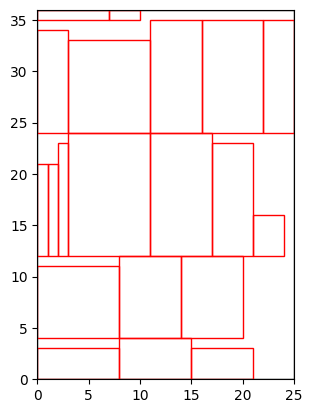

In [6]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import random

# Define the dimensions of the large rectangle
large_width = 25
large_height = sol.get_objective_values()[0]

# Define the number of rectangles and their dimensions
n_rectangles = len(variables.xs)


levels

rectangles = []
for i in range(n_rectangles):
    rectangle_level = int(variables.xs[i].name[6:8].strip("_"))

    x = sol.get_var_solution(variables.xs[i]).get_start()
    y = levels[rectangle_level][0]
    width = sol.get_var_solution(variables.xs[i]).get_size()
    height = instance.heights[i]
    rectangles.append((x, y, width, height))

# Create a figure and axis for plotting
fig, ax = plt.subplots()
ax.set_xlim([0, large_width])
ax.set_ylim([0, large_height])

# Draw the large rectangle
large_rect = Rectangle((0, 0), large_width, large_height, edgecolor='black', facecolor='none')
ax.add_patch(large_rect)

# Draw the small rectangles within the large rectangle
for x, y, width, height in rectangles:
    rect = Rectangle((x, y), width, height, edgecolor='red', facecolor='none')
    ax.add_patch(rect)

# Set the aspect ratio and display the plot
ax.set_aspect('equal', 'box')
plt.show()
